In [151]:
import pandas as pd
import re
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd
import nltk
from nltk import pos_tag
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import string
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score

In [5]:
f=open("db.txt", "r")
contents=0
if not(contents):
    contents = f.read()
username = contents.split("\n")[0]
password = contents.split("\n")[1]
dbname = 'reviews_db'

In [88]:
con = None
con = psycopg2.connect(database = dbname, user = username, password = password, port=5432, host= "/var/run/postgresql/")

# query:
sql_query = """
SELECT * FROM reviews_data_table;
"""
review_data_from_sql = pd.read_sql_query(sql_query,con)
review_data_from_sql.head()

,index,Review,Title
0,0,Love this salon! I was referred over by two of...,Urban Betty
1,1,Came in for a summer haircut since my hair was...,Urban Betty
2,2,I recently moved and have been looking for a g...,Urban Betty
3,3,Y'all stop what you are doing right now and go...,Urban Betty
4,4,"Love, love, love this place! I saw Holly and s...",Urban Betty


In [70]:
first_subset.iloc[3,1]

'I went to this salon last week for the first time. \xa0Rae did my hair. \xa0She needed to cut about 5 inches off my hair because it was so overgrown and damaged from using grocery store dye. \xa0It also was about 5 different colors. \xa0She did a balayage treatement on my hair. \xa0It looks gorgeous! \xa0I have received so many compliments. \xa0I luv it. \xa0Thank you Rae!!!! \xa0This is a great salon.'

In [8]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df    

## This section is for Vader ##

In [156]:
sentiment = SentimentIntensityAnalyzer()
review_data_from_sql = review_data_from_sql['Review'].str.lower().str.replace('[^a-z ]', '')

In [161]:
reviews_for_vader = review_data_from_sql.to_frame().copy()

In [162]:
reviews_for_vader.head()

,Review
0,love this salon i was referred over by two of ...
1,came in for a summer haircut since my hair was...
2,i recently moved and have been looking for a g...
3,yall stop what you are doing right now and go ...
4,love love love this place i saw holly and she ...


In [163]:
reviews_for_vader.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
17397    False
17398    False
17399    False
17400    False
17401    False
17402    False
17403    False
17404    False
17405    False
17406    False
17407    False
17408    False
17409    False
17410    False
17411    False
17412    False
17413    False
17414    False
17415    False
17416    False
17417    False
17418    False
17419    False
17420    False
17421    False
17422    False
17423    False
17424    False
17425    False
17426    False
Length: 17427, dtype: bool

In [164]:
reviews_for_vader = reviews_for_vader.dropna()

In [165]:
def get_sentiment(text):
    sentiment = SentimentIntensityAnalyzer() #### calling Intensity Analyzer
    compound = sentiment.polarity_scores(text)['compound']  ### calling the 'compound' score for the "text" entered
    if compound > 0:
        return 1  ## positive
    else:
        return 0 ## negative
    #else:
        #return "Neutral"     
    return compound

In [166]:
reviews_for_vader['sentiment_vader'] = reviews_for_vader['Review'].apply(get_sentiment) ### in the columns of "imdb"
reviews_for_vader['sentiment_vader'] 

0        1
1        1
2        0
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       0
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       0
        ..
17397    1
17398    1
17399    0
17400    1
17401    1
17402    1
17403    1
17404    1
17405    1
17406    1
17407    1
17408    1
17409    1
17410    1
17411    1
17412    1
17413    1
17414    1
17415    1
17416    1
17417    1
17418    1
17419    1
17420    1
17421    1
17422    0
17423    1
17424    1
17425    1
17426    1
Name: sentiment_vader, Length: 17427, dtype: int64

In [152]:
reviews_for_vader['sentiment_vader'].unique()

array([1])

## End Vader section ##

In [154]:
review_data_from_sql = standardize_text(review_data_from_sql, "Review")

In [155]:
review_data_from_sql.head()

,index,Review,Title
0,0,love this salon! i was referred over by two of...,Urban Betty
1,1,came in for a summer haircut since my hair was...,Urban Betty
2,2,i recently moved and have been looking for a g...,Urban Betty
3,3,y'all stop what you are doing right now and go...,Urban Betty
4,4,"love, love, love this place! i saw holly and s...",Urban Betty


In [75]:
tokenizer = RegexpTokenizer(r'\w+')

review_data_from_sql["tokens"] = review_data_from_sql["Review"].apply(tokenizer.tokenize)
review_data_from_sql.head()

,index,Review,Title,tokens
0,0,Love this salon! I was referred over by two of...,Urban Betty,"[Love, this, salon, I, was, referred, over, by..."
1,1,Came in for a summer haircut since my hair was...,Urban Betty,"[Came, in, for, a, summer, haircut, since, my,..."
2,2,I recently moved and have been looking for a g...,Urban Betty,"[I, recently, moved, and, have, been, looking,..."
3,3,Y'all stop what you are doing right now and go...,Urban Betty,"[Y, all, stop, what, you, are, doing, right, n..."
4,4,"Love, love, love this place! I saw Holly and s...",Urban Betty,"[Love, love, love, this, place, I, saw, Holly,..."


In [76]:
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [77]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [92]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/cjdavis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/cjdavis/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/cjdavis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/cjdavis/nltk_data...


True

In [79]:
review_data_from_sql["Review_cleaned"] = review_data_from_sql["Review"].apply(lambda x: clean_text(x))

In [153]:
review_data_from_sql.head()

,index,Review,Title
0,0,Love this salon! I was referred over by two of...,Urban Betty
1,1,Came in for a summer haircut since my hair was...,Urban Betty
2,2,I recently moved and have been looking for a g...,Urban Betty
3,3,Y'all stop what you are doing right now and go...,Urban Betty
4,4,"Love, love, love this place! I saw Holly and s...",Urban Betty


In [17]:
all_words = [word for tokens in review_data_from_sql["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in review_data_from_sql["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

2122519 words total, with a vocabulary size of 23153
Max sentence length is 1038


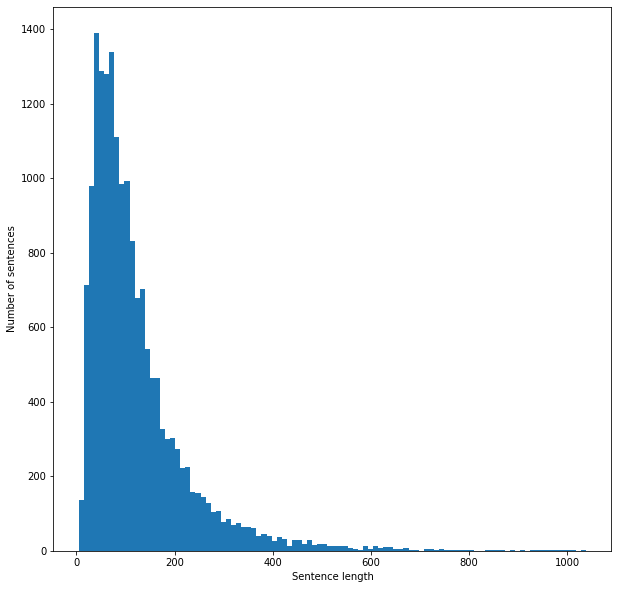

In [20]:
fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths, bins=100)
plt.show()

In [99]:
reviews_by_title["Review"] = review_data_from_sql.groupby("Title").Review.apply(lambda x: " ".join(x))

In [122]:
reviews_by_title.head()

Title
4001 Duval Hair Salon    I was looking for a new hair stylist when my S...
A Carter T Lund Salon    The best salon experience I've ever had. Have ...
ACES Salon               If you have curly hair, go see Katy Lee (Delga...
AMZ Salon                I really like this place. I get my hair done h...
ATX Bridal Beauty        Cannot say enough great things about Jessi and...
Name: Review, dtype: object

In [130]:
review_df = reviews_by_title.to_frame()
review_df.head()

,Review
Title,
4001 Duval Hair Salon,I was looking for a new hair stylist when my S...
A Carter T Lund Salon,The best salon experience I've ever had. Have ...
ACES Salon,"If you have curly hair, go see Katy Lee (Delga..."
AMZ Salon,I really like this place. I get my hair done h...
ATX Bridal Beauty,Cannot say enough great things about Jessi and...
